In [ ]:
import pandas as pd
train = pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


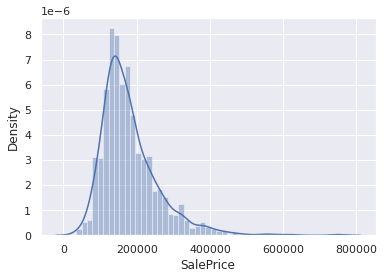

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(train['SalePrice']);
plt.show()

In [ ]:
train=train.drop(["PoolQC","MiscFeature","Alley","Id"],axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [ ]:
categoric=[]
numeric=[]
for i in train.columns:
      if train[i].dtypes == 'object' :
          categoric.append(i)
      else:
           numeric.append(i)
len(numeric)

37

In [ ]:
categoric1=[]
numeric1=[]
for i in test.columns:
      if test[i].dtypes == 'object' :
          categoric1.append(i)
      else:
           numeric1.append(i)
len(numeric)

37

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
train.loc[:,numeric] = imputer.fit_transform(train.loc[:,numeric])

imputer = KNNImputer(n_neighbors=5)
test.loc[:,numeric1] = imputer.fit_transform(test.loc[:,numeric1])


In [ ]:
for i in numeric:
  if i!="SalePrice":
      train[i]/=train[i].max()
      test[i]/=test[i].max()


In [ ]:
for i in categoric:
     train[i]=train[i].fillna(train[i].mode()[0])
     if i!="SalePrice":
        test[i]=test[i].fillna(test[i].mode()[0])

In [ ]:
for i in train.columns:
  if train[i].dtypes == 'object' :
    train[i]=train[i].astype('category').cat.codes
for i in test.columns:
  if test[i].dtypes == 'object' :
    test[i]=test[i].astype('category').cat.codes


In [ ]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.315789,3,0.207668,0.039258,1,3,3,0,4,0,5,2,2,0,5,0.7,0.555556,0.996517,0.996517,1,1,12,13,1,0.122500,2,4,2,2,3,3,2,0.125089,5,0.000000,0.064212,0.140098,1,0,1,4,0.182438,0.413559,0.0,0.303084,0.333333,0.0,0.666667,0.5,0.375,0.333333,2,0.571429,6,0.000000,2,1,0.996517,1,0.50,0.386460,4,4,2,0.000000,0.111517,0.000000,0.0,0.0,0.0,2,0.00000,0.166667,0.999005,8,4,208500.0
1,0.105263,3,0.255591,0.044600,1,3,3,0,2,0,24,1,2,0,2,0.6,0.888889,0.983085,0.983085,1,1,8,8,2,0.000000,3,4,1,2,3,1,0,0.173281,5,0.000000,0.121575,0.206547,1,0,1,4,0.268968,0.000000,0.0,0.223680,0.000000,0.5,0.666667,0.0,0.375,0.333333,3,0.428571,6,0.333333,4,1,0.983085,1,0.50,0.324401,4,4,2,0.347725,0.000000,0.000000,0.0,0.0,0.0,2,0.00000,0.416667,0.998507,8,4,181500.0
2,0.315789,3,0.217252,0.052266,1,0,3,0,4,0,5,2,2,0,5,0.7,0.555556,0.995522,0.996020,1,1,12,13,1,0.101250,2,4,2,2,3,2,2,0.086109,5,0.000000,0.185788,0.150573,1,0,1,4,0.196078,0.419370,0.0,0.316554,0.333333,0.0,0.666667,0.5,0.375,0.333333,2,0.428571,6,0.333333,4,1,0.995522,1,0.50,0.428773,4,4,2,0.000000,0.076782,0.000000,0.0,0.0,0.0,2,0.00000,0.750000,0.999005,8,4,223500.0
3,0.368421,3,0.191693,0.044368,1,0,3,0,0,0,6,2,2,0,5,0.7,0.555556,0.952736,0.980100,1,1,13,15,2,0.000000,3,4,0,3,1,3,0,0.038271,5,0.000000,0.231164,0.123732,1,2,1,4,0.204817,0.366102,0.0,0.304325,0.333333,0.0,0.333333,0.0,0.375,0.333333,2,0.500000,6,0.333333,2,5,0.994030,2,0.75,0.452750,4,4,2,0.000000,0.063985,0.492754,0.0,0.0,0.0,2,0.00000,0.166667,0.998010,8,0,140000.0
4,0.315789,3,0.268371,0.066250,1,0,3,0,2,0,15,2,2,0,5,0.8,0.555556,0.995025,0.995025,1,1,12,13,1,0.218750,2,4,2,2,3,0,2,0.116052,5,0.000000,0.209760,0.187398,1,0,1,4,0.244032,0.509927,0.0,0.389578,0.333333,0.0,0.666667,0.5,0.500,0.333333,2,0.642857,6,0.333333,4,1,0.995025,1,0.75,0.589563,4,4,2,0.224037,0.153565,0.000000,0.0,0.0,0.0,2,0.00000,1.000000,0.999005,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.315789,3,0.198083,0.036781,1,3,3,0,4,0,8,2,2,0,5,0.6,0.555556,0.994527,0.995025,1,1,12,13,2,0.000000,3,4,2,2,3,3,5,0.000000,5,0.000000,0.407962,0.155974,1,0,1,4,0.203112,0.336077,0.0,0.291918,0.000000,0.0,0.666667,0.5,0.375,0.333333,3,0.500000,6,0.333333,4,1,0.994527,1,0.50,0.324401,4,4,2,0.000000,0.073126,0.000000,0.0,0.0,0.0,2,0.00000,0.666667,0.998507,8,4,175000.0
1456,0.105263,3,0.271565,0.061209,1,3,3,0,4,0,14,2,2,0,2,0.6,0.666667,0.984080,0.989055,1,1,9,10,3,0.074375,3,4,1,2,3,3,0,0.139972,4,0.110583,0.252140,0.252373,1,4,1,4,0.441816,0.000000,0.0,0.367423,0.333333,0.0,0.666667,0.0,0.375,0.333333,3,0.500000,2,0.666667,4,1,0.984080,2,0.50,0.352609,4,4,2,0.407235,0.000000,0.000000,0.0,0.0,0.0,2,0.00000,0.166667,1.000000,8,4,210000.0
1457,0.368421,3,0.210863,0.042008,1,3,3,0,4,0,6,2,2,0,5,0.7,1.000000,0.965672,0.998010,1,1,5,5,2,0.000000,0,2,4,3,1,3,2,0.048724,5,0.000000,0.375428,0.188543,1,0,1,4,0.253197,0.557869,0.0,0.414747,0.000000,0.0,0.666667,0.0,0.500,0.33333

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   int8   
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   int8   
 5   LotShape       1460 non-null   int8   
 6   LandContour    1460 non-null   int8   
 7   Utilities      1460 non-null   int8   
 8   LotConfig      1460 non-null   int8   
 9   LandSlope      1460 non-null   int8   
 10  Neighborhood   1460 non-null   int8   
 11  Condition1     1460 non-null   int8   
 12  Condition2     1460 non-null   int8   
 13  BldgType       1460 non-null   int8   
 14  HouseStyle     1460 non-null   int8   
 15  OverallQual    1460 non-null   float64
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

In [ ]:
train=train.drop(["GarageType","GarageYrBlt","GarageFinish","GarageQual"],axis=1)
test=test.drop(["GarageType","GarageYrBlt","GarageFinish","GarageQual"],axis=1)

In [ ]:
train.corrwith(train["SalePrice"]).sort_values(ascending=False).head(50)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.479311
Fireplaces       0.466929
BsmtFinSF1       0.386420
Foundation       0.382479
LotFrontage      0.357296
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
CentralAir       0.251328
Electrical       0.234945
PavedDrive       0.231357
BsmtFullBath     0.227122
RoofStyle        0.222405
BsmtUnfSF        0.214479
SaleCondition    0.213092
Neighborhood     0.210851
HouseStyle       0.180163
BedroomAbvGr     0.168213
GarageCond       0.134740
RoofMatl         0.132383
ExterCond        0.117303
Functional       0.115328
ScreenPorch      0.111447
Exterior2nd      0.103766
Exterior1st      0.103551
PoolArea    

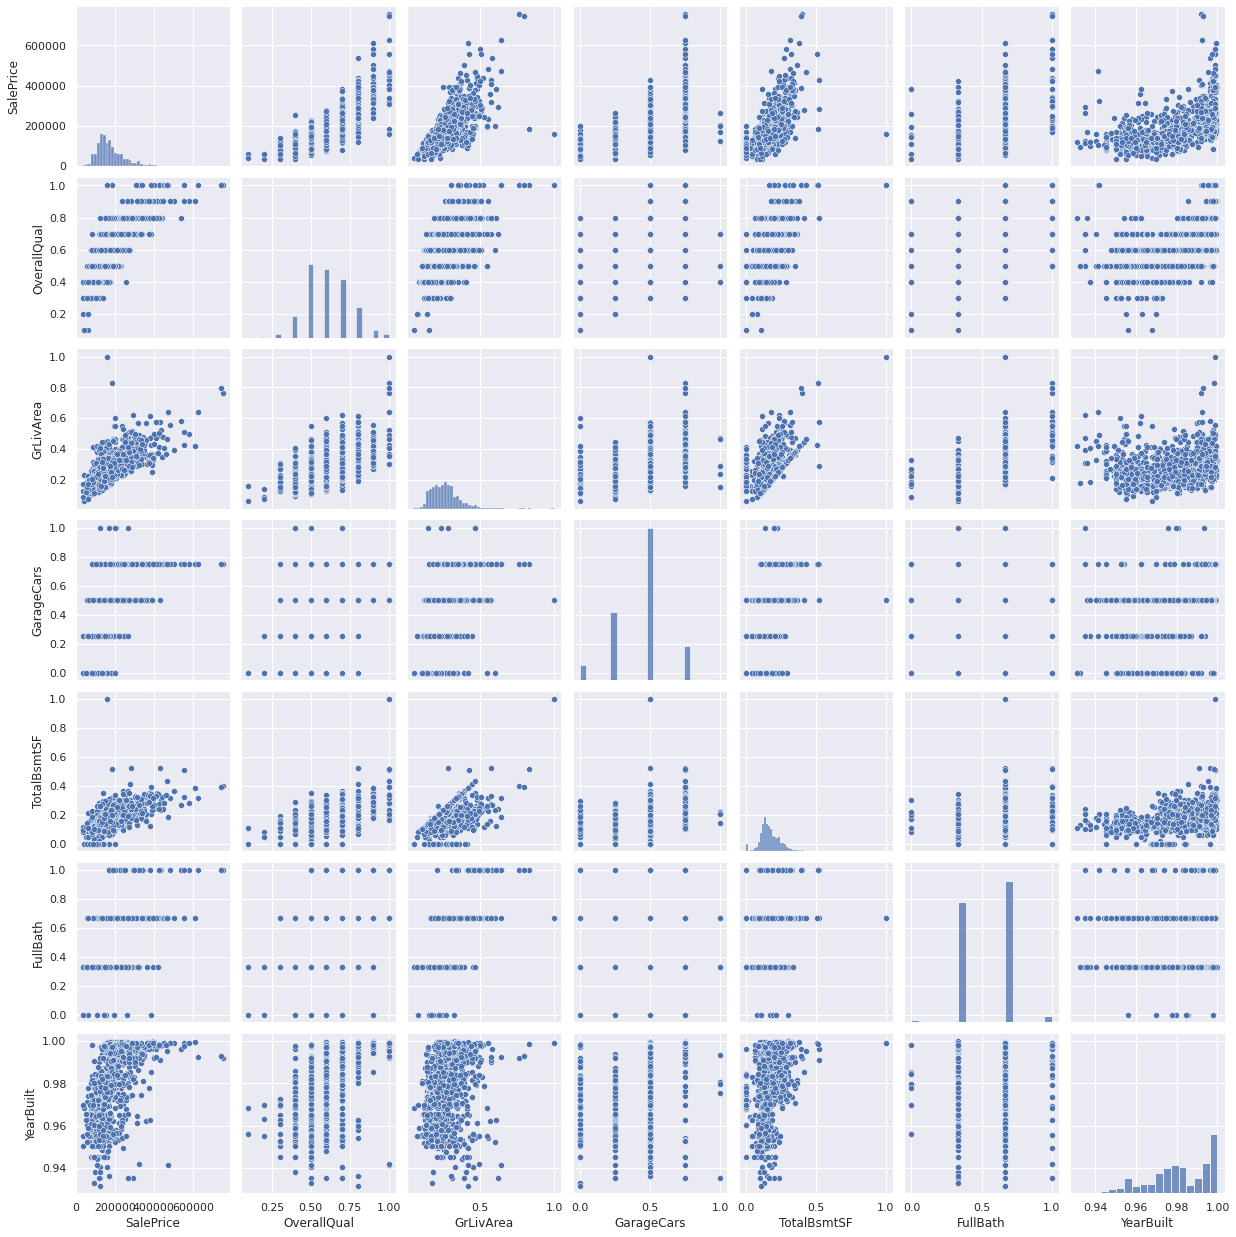

In [ ]:
import seaborn as sns

high_corr=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.set()
sns.pairplot(train[high_corr], height = 2.5)
plt.show()

model

In [ ]:
from sklearn.model_selection import train_test_split

y=train['SalePrice']
X=train.drop('SalePrice',axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8)

linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print('mae:',mean_absolute_error(y_valid, y_pred,))
print('mse:',mean_squared_error(y_valid, y_pred))
print('rmse:',mean_squared_error(y_valid, y_pred, squared=False))

mae: 21261.07818534578
mse: 1396611094.2165687
rmse: 37371.26027064874


SVR

mae: 56417.06648393519
mse: 7909313062.066791
rmse: 88934.31880925827


logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=40)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

print('mae:',mean_absolute_error(y_valid, y_pred,))
print('mse:',mean_squared_error(y_valid, y_pred))
print('rmse:',mean_squared_error(y_valid, y_pred, squared=False))

mae: 42245.41438356164
mse: 5003670848.818493
rmse: 70736.6301771472


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
